 

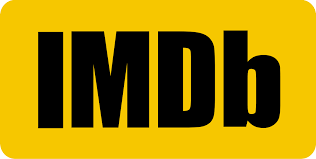 
# SENTIMENT ANALYSIS OF MOVIEW REVIEW From IMDB
## USING  Classical Machine Learning Models, Ensemble of Classical Machine Learning Models and DEEP NEURAL NETS

On a daily basis, billions of text data that express sentiment are
generated on the internet through social media and the entertainment industry.
Analyzing how a customer feels about a drama, tv series and movies are really
important to the entertainment industry. For instance, in case of movies, a movie
production company may need to know how customers feel about their movie. This
evaluation could be done through criteria such as was the movie good or bad, were
there parts of the movie that were good or bad, did the actors perform good or bad
and several other criteria. One way to evaluate these criteria would be through the
movie reviews left by customers. These reviews could be used to analyze the criteria
mentioned earlier. This analysis could be used to make changes in future movies
such as selecting an actor for a particular genre of movie, which part of movie should
be used for movie previews to attract people. This eventually will lead to increased
revenue for movie production companies. Thus the extreme need for Sentiment
analysis on movie review. The most popular platform today where people leave
movies reviews is IMDB. This project will analyze IMDB movie reviews and in a
broader sense will analyze whether a review for a movie is positive or negative. The
basic steps involve data mining and then training a machine learning model to
recognize whether a given movie’s review is positive or negative. Then the model
can predict whether a given review was positive or negative

## Task1: Load Data

In [1]:
import pandas as pd #for data container

In [2]:
raw_reviews_df = pd.read_csv("imdb_reviews.csv") #read from csv file

In [3]:
raw_reviews_df.shape #view dimensions of the pandas daframe

(50000, 2)

In [4]:
raw_reviews_df.iloc[0:1] #view one movie review

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive


In [5]:
raw_reviews_df.info() #vew information abot Daframe in general

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


## Task2: Preprocess Data

In [6]:
from matplotlib import pyplot as plt#to plot histogram

Text(0, 0.5, 'Number of samples')

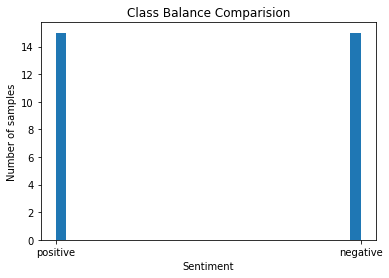

In [7]:
plt.hist(raw_reviews_df["sentiment"],density=True,bins=30)
plt.title("Class Balance Comparision")
plt.xlabel("Sentiment")
plt.ylabel("Number of samples")

In [8]:
print("Total Samples for Positive Sentiments: ",len(raw_reviews_df[raw_reviews_df["sentiment"]=="positive"]))
print("Total Samples for Negative Sentiments: ",len(raw_reviews_df[raw_reviews_df["sentiment"]=="negative"]))

Total Samples for Positive Sentiments:  25000
Total Samples for Negative Sentiments:  25000


In [9]:
print("Total Samples which do not have reviews: ",len(raw_reviews_df[raw_reviews_df["review"]==None]))

Total Samples which do not have reviews:  0


In [10]:
from wordcloud import WordCloud #library that allows word cloud to be generated

In [11]:
#convert the column specified by column_name in dataset_df(dataframe) to list
sentences_list = (raw_reviews_df[raw_reviews_df["sentiment"]=="negative"])["review"].tolist()

In [12]:
#convert a list to sentence
sentences_single_string = " ".join(sentences_list)

Text(0.5, 1.0, 'Negative Reviews')

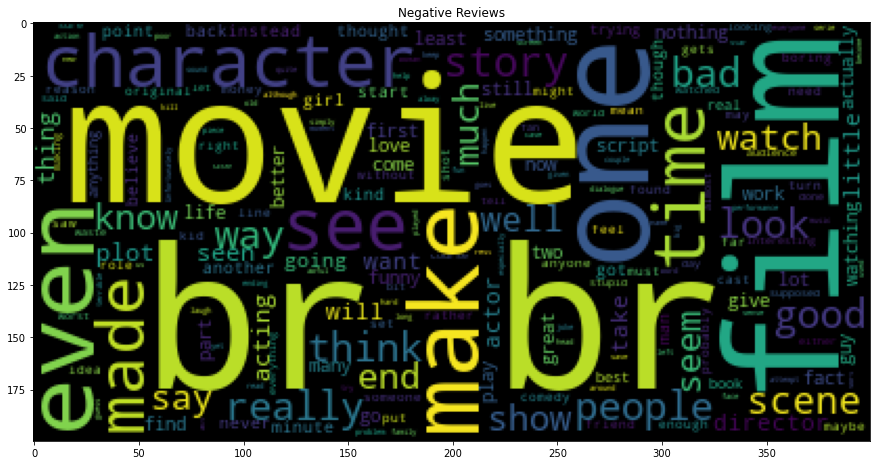

In [13]:
#plot word cloud
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(sentences_single_string))
plt.title("Negative Reviews")

In [14]:
#convert the column specified by column_name in dataset_df(dataframe) to list
sentences_list = (raw_reviews_df[raw_reviews_df["sentiment"]=="positive"])["review"].tolist()

In [15]:
#convert a list to sentence
sentences_single_string = " ".join(sentences_list)

Text(0.5, 1.0, 'Positive Reviews')

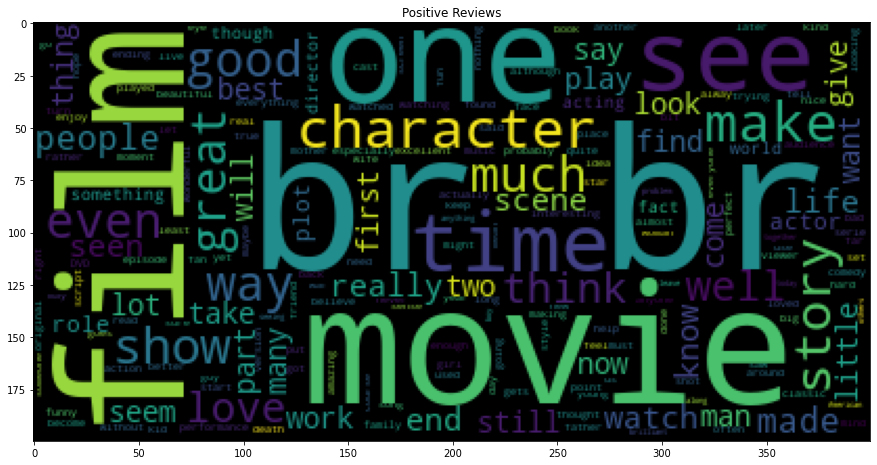

In [16]:
#plot word cloud
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(sentences_single_string))
plt.title("Positive Reviews")

In [17]:
from PIL import Image
import numpy as np

def generate_word_cloud(dataframe_df,column_name,img_file=None,background_color="black",max_words=2000):
    """ This function generates word cloud
    
    Args:
        dataframe: the datafram object which contains column whose word cloud is to be generated
        column_name: the name of the column in dataframw whose cloud is to be generated
        
    Returns:
        None
    """
    #convert the column specified by column_name in dataset_df(dataframe) to list
    sentences_list = dataframe_df[column_name].tolist()
    
    #convert a list to sentence
    sentences_single_string = " ".join(sentences_list)
    
    #plot word cloud
    plt.figure(figsize=(15,15))
    
    img_mask = None
    
    if img_file != None:
        img_mask = np.array(Image.open(img_file))

    wc = WordCloud(mask=img_mask,
                   max_words=max_words,
                   background_color=background_color)        
        
    plt.imshow(wc.generate(sentences_single_string),interpolation="bilinear")
    plt.title("Word Cloud For " +  column_name)
    plt.show()

## Task3: Text Preprocessing

In part, text preprocessing tasks such as removing stopwords, punctuation is done

In [18]:
import string #lobrary that contains punctuation marks

string.punctuation #these punctuation will be remove from all movie reviews

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
a_review = raw_reviews_df["review"].iloc[0]
a_review

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [20]:
def remove_punctuation(text):
    """ This function removes punctuation marks from a given string
    
    Args:
        text: A string from where punctuation marks are to be removed if they exist
        
    Returns:
        punctuation_removed_text: A string from which punctuation mark is removed.
    """
    
    punctuation_removed_list = [char for char in text if char not in string.punctuation]
    
    punctuation_removed_text = "".join(punctuation_removed_list)
    
    return punctuation_removed_text

In [21]:
a_review = remove_punctuation(a_review)

In [22]:
a_review

'One of the other reviewers has mentioned that after watching just 1 Oz episode youll be hooked They are right as this is exactly what happened with mebr br The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not a show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the wordbr br It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to manyAryans Muslims gangstas Latinos Christians Italians Irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br I would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare Fo

In [23]:
import nltk #import natural laguage processing tooklikt which will give parameters for stopwords removal
nltk.download('stopwords') #download stopwords
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\achar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
#lets look what stopwords are in English Language
stop_words_list = stopwords.words('english')
print(stop_words_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [25]:
a_review

'One of the other reviewers has mentioned that after watching just 1 Oz episode youll be hooked They are right as this is exactly what happened with mebr br The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not a show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the wordbr br It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to manyAryans Muslims gangstas Latinos Christians Italians Irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br I would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare Fo

In [26]:
def remove_stop_words(text):
    """ This function removes stopwords from a given string.
    
    Args:
        text(string): The string from which stop words are to be removed.
        
    Returns:
        string: A string that is free of stop words
    """
    word_list = text.split(" ")
    word_list_new = [word.lower() for word in word_list if word.lower() not in stopwords.words("english")]
    word_string = " ".join(word_list_new)
    return word_string

In [27]:
a_review = remove_stop_words(a_review)

In [28]:
def remove_punctuation_and_stop_words(sentence):
    """This function removes clean a sentence removing punctation and stopwords
    Args:
        sentence(string): A string containing a sentence
    Return:
        cleaned_sentence(string): sentence free of stopwords and punctuation
    """
    #remove punctuation and characters made lower case, ends up being list of characters
    punctation_removed = [char.lower() for char in sentence if char not in string.punctuation]

    #join list of characters back to make a single string
    punctation_removed_join = "".join(punctation_removed)

    #remove stop words
    cleaned_sentence = [word for word in punctation_removed_join.split() if word not in stopwords.words("english")]

    cleaned_sentence_string = " ".join(cleaned_sentence)
    
    return cleaned_sentence_string

In [29]:
another_review = raw_reviews_df["review"].iloc[30000]
another_review

'One of quite a few cartoon Scooby Doo films, "Scooby Doo and the Loch Ness Monster" turns out to be entertaining, exciting, interesting, funny and also does a surprisingly good interpretation of the Highlands of Scotland. One annoying aspect of the film is the voices of many of the characters - American people trying to sound Scottish in this film are unfortunately not succeeding all that well (although some people do better Scottish accents than others).<br /><br />Daphne has come to the Highlands to see her cousin Shannon and the Highland games at Blake Castle. Gravely Shannon tells the gang that she believes to have seen the Loch Ness Monster. When yet more chaos arises, the Mystery Inc Gang have another mystery on their hands...<br /><br />Good for Scooby Doo fans and for people who want to find out more about Scotland! Enjoy "Scooby Doo and the Loch Ness Monster"! :-)'

In [30]:
another_review = remove_punctuation_and_stop_words(another_review)
another_review

'one quite cartoon scooby doo films scooby doo loch ness monster turns entertaining exciting interesting funny also surprisingly good interpretation highlands scotland one annoying aspect film voices many characters american people trying sound scottish film unfortunately succeeding well although people better scottish accents othersbr br daphne come highlands see cousin shannon highland games blake castle gravely shannon tells gang believes seen loch ness monster yet chaos arises mystery inc gang another mystery handsbr br good scooby doo fans people want find scotland enjoy scooby doo loch ness monster'

In [31]:
#remove punctuation and stopwords
#raw_reviews_df["review"] = raw_reviews_df["review"].apply(remove_punctuation_and_stop_words)

In [32]:
#save file to csv
#raw_reviews_df.to_csv("imdb_reviews_cleaned.csv")

In [33]:
raw_reviews_df = pd.read_csv("imdb_reviews_cleaned.csv")

In [34]:
raw_reviews_df["review"].iloc[30000]

'one quite cartoon scooby doo films scooby doo loch ness monster turns entertaining exciting interesting funny also surprisingly good interpretation highlands scotland one annoying aspect film voices many characters american people trying sound scottish film unfortunately succeeding well although people better scottish accents othersbr br daphne come highlands see cousin shannon highland games blake castle gravely shannon tells gang believes seen loch ness monster yet chaos arises mystery inc gang another mystery handsbr br good scooby doo fans people want find scotland enjoy scooby doo loch ness monster'

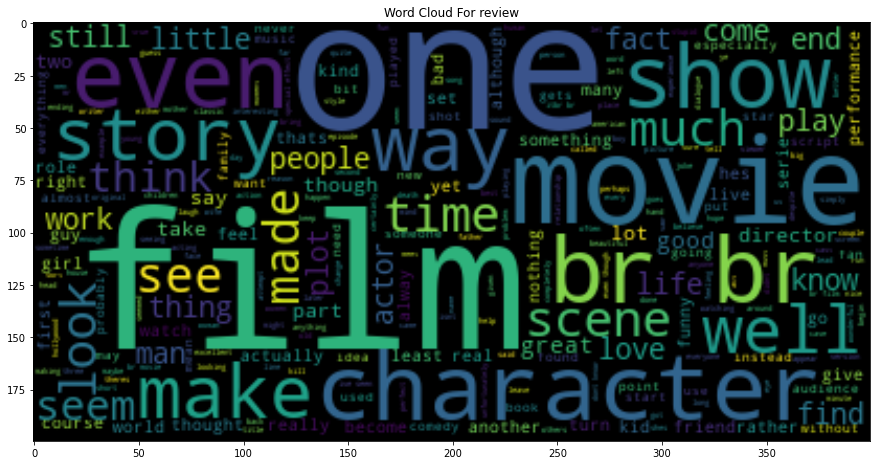

In [35]:
#from collections import Counter
#generate_word_cloud(raw_reviews_df,"review",img_file="download.jpg")
generate_word_cloud(raw_reviews_df,"review",background_color="black")

## Task 4: Generate Features from reviews And Numerical labels for Sentiment

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
vectorizer = TfidfVectorizer()

In [38]:
feature_matrix = vectorizer.fit_transform(raw_reviews_df["review"].tolist())

In [39]:
feature_matrix.shape

(50000, 180355)

In [40]:
#import label encoder
from sklearn import preprocessing

In [41]:
label_encoder = preprocessing.LabelEncoder()

In [42]:
labels = label_encoder.fit_transform(raw_reviews_df["sentiment"])

In [43]:
len(labels)

50000

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
feature_matrix_train, feature_matrix_test, labels_train, labels_test = train_test_split(feature_matrix, labels, test_size=0.2, random_state=0)

In [46]:
print("Features Train Shape: ", feature_matrix_train.shape)
print("Labels Train Shape: ", labels_train.shape)
print("")
print("Features Test Shape: ", feature_matrix_test.shape)
print("Labels Test Shape: ", labels_test.shape)

Features Train Shape:  (40000, 180355)
Labels Train Shape:  (40000,)

Features Test Shape:  (10000, 180355)
Labels Test Shape:  (10000,)


## Task 5: Train and Test Classical Machine Learning Models

In [47]:
#Train Naive Bayes Model
#More Details: https://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import BernoulliNB
model_nb = BernoulliNB()
model_nb.fit(feature_matrix_train, labels_train)
accuracy_train_set = model_nb.score(feature_matrix_train,labels_train)  #get accuracy on train set
accuracy_test_set = model_nb.score(feature_matrix_test,labels_test)  #get accuracy on test set
print("Naiive Bayes Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Naiive Bayes Model, Accuracy (Test Set) : ", accuracy_test_set)

Naiive Bayes Model, Accuracy (Train Set) :  0.919475
Naiive Bayes Model, Accuracy (Test Set) :  0.8534


In [51]:
#Train Descision Trees Model
#More Details: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree
from sklearn.tree import DecisionTreeClassifier
maximum_tree_depth= 200
model_dt = DecisionTreeClassifier(max_depth=maximum_tree_depth)
model_dt.fit(feature_matrix_train, labels_train)
accuracy_train_set = model_dt.score(feature_matrix_train,labels_train)  #get accuracy on train set
accuracy_test_set = model_dt.score(feature_matrix_test,labels_test)  #get accuracy on test set
print("Descision Tree Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Descision Tree Model, Accuracy (Test Set) : ", accuracy_test_set)

Descision Tree Model, Accuracy (Train Set) :  1.0
Descision Tree Model, Accuracy (Test Set) :  0.73


In [52]:
#Train K Nearest Negihbor Model
#More Details: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
#MOre Details: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier
number_of_neigbors = 5
minkowski_power = 2 # Manhattan Distance = 1, Euclidean Distance = 2
model_knn = KNeighborsClassifier(n_neighbors=number_of_neigbors, p =minkowski_power)
model_knn.fit(feature_matrix_train, labels_train)
accuracy_train_set = model_knn.score(feature_matrix_train,labels_train)  #get accuracy on train set
accuracy_test_set = model_knn.score(feature_matrix_test,labels_test)  #get accuracy on test set
print("K Nearest Neighbors Model, Accuracy (Train Set) : ", accuracy_train_set)
print("K Nearest Neighbors Model, Accuracy (Test Set) : ", accuracy_test_set)

K Nearest Neighbors Model, Accuracy (Train Set) :  0.8596
K Nearest Neighbors Model, Accuracy (Test Set) :  0.7786


In [53]:
#Train Logistic Regression Model
#More Details: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression #import model for logistic regression
l2_norm = 0.8 # regularization parameter
l2_norm_inverse = 1/l2_norm 
maximum_iterations=4000 #maximum number of iterations
model_lr = LogisticRegression(C=l2_norm_inverse,max_iter=maximum_iterations) #create logistic regression model
model_lr.fit(feature_matrix_train, labels_train)
accuracy_train_set = model_lr.score(feature_matrix_train,labels_train)  #get accuracy on train set
accuracy_test_set = model_lr.score(feature_matrix_test,labels_test)  #get accuracy on test set
print("Logistic Regression Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Logistic Regression Model, Accuracy (Test Set) : ", accuracy_test_set)

Logistic Regression Model, Accuracy (Train Set) :  0.9424
Logistic Regression Model, Accuracy (Test Set) :  0.8919


In [54]:
#Train Support Vector Machine Model
#More Details: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
from sklearn.svm import LinearSVC
l2_norm = 2
l2_norm_inverse = 1/l2_norm
maximum_iterations=4000 #maximum number of iterations
model_svm = LinearSVC(C=l2_norm_inverse,max_iter=maximum_iterations) #create support vector machine model
model_svm.fit(feature_matrix_train, labels_train)
accuracy_train_set = model_svm.score(feature_matrix_train,labels_train)  #get accuracy on train set
accuracy_test_set = model_svm.score(feature_matrix_test,labels_test)  #get accuracy on test set
print("Support Vector Machine Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Support Vector Machine Model, Accuracy (Test Set) : ", accuracy_test_set)

Support Vector Machine Model, Accuracy (Train Set) :  0.980825
Support Vector Machine Model, Accuracy (Test Set) :  0.8967


<h3> Summary Of Classical Machine Learning Models </h3>
<br>

<table>
    <tr>
        <th>Model</th>
        <th>Accuracy on Train</th>
        <th>Accuracy on Test</th>
    </tr>
    <tr>
        <td>Naive Bayes</td>
        <td>0.919475</td>
        <td>0.8534</td>
    </tr>
    <tr>
        <td>Descision Trees</td>
        <td>1.0</td>
        <td>0.7327</td>
    </tr>
    <tr>
        <td>K Nearest Neighbors</td>
        <td> 0.8596</td>
        <td>0.7786</td>
    </tr>    
    <tr>
        <td>Logistic Regression</td>
        <td>0.9424</td>
        <td>0.8919</td>
    </tr>    
    <tr>
        <td>Support Vector Machine</td>
        <td>0.980825</td>
        <td>0.8967</td>
    </tr>    
</table>

<br>
<p> From the table above, the maximum accuracy in around 0.9, which is descent but not great. It could be because of overfitting since the accuracy on train set is pretty high. Assuming overffitting and regularizing more, the accuray doesnt significalty go up. Stacking These traditional ML Model however could help increase accuracy lets explore that</P>

## Task 5: Train and Test  Stacked Classical Machine Learning Models (Ensemble Learning)

#### Details: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html
#### More Details: https://en.wikipedia.org/wiki/Ensemble_learning#Stacking

In [59]:
#Create a stack of these estimators
estimators = [
    ("nb",model_nb), #stack naive bayes
    ("knn",model_knn), #stack K nearest neighor
    ('svm', model_svm) #stack support vector machine
]

#Train a stacked model
from sklearn.ensemble import StackingClassifier
model_stacked = StackingClassifier(estimators=estimators, final_estimator=model_lr) #use logisitc regression as the final estimator
model_stacked.fit(feature_matrix_train, labels_train)
accuracy_train_set = model_stacked.score(feature_matrix_train,labels_train)  #get accuracy on train set
accuracy_test_set = model_stacked.score(feature_matrix_test,labels_test)  #get accuracy on test set
print("Stacked ML Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Stacked ML Model, Accuracy (Test Set) : ", accuracy_test_set)

Stacked ML Model, Accuracy (Train Set) :  0.978525
Stacked ML Model, Accuracy (Test Set) :  0.9029
